# FEATURE ENGINEERING FOR NLP

## Lab Objective:
To understand how raw text is converted into numerical representations and to analyze the strengths and limitations of different feature engineering techniques across multiple languages.


## Load dataset

In [10]:
with open("swedish_short_story.txt", "r", encoding="utf-8") as f:
    sentences = [line.strip() for line in f if line.strip()]

print("Total sentences:", len(sentences))



Total sentences: 303


## Normalization and lowercasing:
This converts text to lowercase and removes punctuation while preserving Swedish characters (å, ä, ö).

In [11]:
import re

def normalize(text):
    text = text.lower()
    text = re.sub(r"[^\wåäö\s]", "", text) # keep swedish letters
    return text

sentences = [normalize(s) for s in sentences]


## Tokenizing (Sentencepiece Tokenizing):

In [15]:
import sentencepiece as spm

spm.SentencePieceTrainer.train(
    input="swedish_short_story.txt",
    model_prefix="swedish_sp",
    vocab_size=2000,
    model_type="bpe"
)

sp = spm.SentencePieceProcessor()
sp.load("swedish_sp.model")

tokenized_sentences = [sp.encode(s, out_type=str) for s in sentences]

print(tokenized_sentences)

[['▁i', '▁anledning', '▁av', '▁de', '▁tre', '▁fr', 'ågor', '▁som', '▁r', 'edak', 'tionen', '▁till', 'ställt', '▁mig', '▁för'], ['▁bes', 'varande', '▁beträffande', '▁ungdom', 'sbrottsligheten', '▁och', '▁kristiden', '▁får'], ['▁jag', '▁v', 'örds', 'amt', '▁med', 'dela', '▁följ', 'ande'], ['▁vid', 'kommande', 's', '▁till', '▁för', 'st', '▁frågan', '▁hu', 'ruvida', '▁i', '▁min', '▁ver', 'ksamhet', '▁vid'], ['▁h', 'all', '▁för', 'märkts', '▁öka', 'de', '▁lag', 'över', 'trä', 'delser', '▁bland', '▁ungdomen', '▁under'], ['▁krigsåren', '▁må', '▁framhållas', '▁att', '▁antalet', '▁ansökningar', '▁för', '▁inträde', '▁vid', '▁h', 'all'], ['▁vilket', '▁antal', '▁även', '▁före', '▁kriget', '▁var', '▁större', '▁än', '▁antalet', '▁led', 'iga', '▁platser'], ['▁under', '▁särskilt', '▁de', '▁två', '▁si', 'stför', 'flutna', '▁åren', '▁stigit', '▁i', '▁hög', 'st', '▁betänklig'], ['▁grad', '▁betänklig', '▁i', '▁anledning', '▁av', '▁den', '▁omständig', 'heten', '▁att'], ['▁ifrågavarande', '▁brottsliga', '▁g

## Statistics Report:

In [5]:
import numpy as np
from collections import Counter

vocab = set(token for sent in tokenized_sentences for token in sent)
print("Vocabulary size:", len(vocab))

lengths = [len(sent) for sent in tokenized_sentences]
print("Average sentence length:", np.mean(lengths))

print("Most common words: ")
freq = Counter(token for sent in tokenized_sentences for token in sent)
freq.most_common(10)

Vocabulary size: 1301
Average sentence length: 12.277227722772277
Most common words: 


[('▁och', 86),
 ('▁att', 81),
 ('▁i', 75),
 ('▁av', 75),
 ('▁de', 63),
 ('▁till', 46),
 ('▁för', 43),
 ('▁som', 41),
 ('▁det', 41),
 ('▁på', 41)]

## Feature Engineering Tasks:

### Task 1: Bag of Words(BoW):

##### Construct BoW & Document-Term Matrix:

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
joined_sentences = [" ".join(sent) for sent in tokenized_sentences]

vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(joined_sentences)

bow_df = pd.DataFrame(
    bow_matrix.toarray(),
    columns=vectorizer.get_feature_names_out()
)

print(bow_df)

     11  13  14  15  190  1902  1903  1911  1913  1914  ...  önt  öra  örds  \
0     0   0   0   0    0     0     0     0     0     0  ...    0    0     0   
1     0   0   0   0    0     0     0     0     0     0  ...    0    0     0   
2     0   0   0   0    0     0     0     0     0     0  ...    0    0     1   
3     0   0   0   0    0     0     0     0     0     0  ...    0    0     0   
4     0   0   0   0    0     0     0     0     0     0  ...    0    0     0   
..   ..  ..  ..  ..  ...   ...   ...   ...   ...   ...  ...  ...  ...   ...   
298   0   0   0   0    0     0     0     0     0     0  ...    0    0     0   
299   0   0   0   0    0     0     0     0     0     0  ...    0    0     0   
300   0   0   0   0    0     0     0     0     0     0  ...    0    0     0   
301   0   0   0   0    0     0     0     0     0     0  ...    0    0     0   
302   0   0   0   0    0     0     0     0     0     0  ...    0    0     0   

     örer  örkt  öv  öva  övats  över  överlämnande

##### Top 20 frequent words:

In [28]:
import pandas as pd

word_freq = bow_matrix.sum(axis=0).A1
words = vectorizer.get_feature_names_out()

df_bow = pd.DataFrame({"word": words, "freq": word_freq})
df_bow.sort_values("freq", ascending=False).head(20)


,word,freq
673,och,88
85,att,81
87,av,76
162,de,66
985,till,48
320,för,46
239,en,43
750,på,42
884,som,41
180,det,41


##### Sparsity of BoW matrix:

In [29]:
sparsity = 1 - (bow_matrix.count_nonzero() / (bow_matrix.shape[0] * bow_matrix.shape[1]))
print("BoW Sparsity:", sparsity)


BoW Sparsity: 0.9905669466029172


### Analysis:

#### Does word order matter in BoW?

No. Bag of Words completely ignores word order. It only counts how many times each word appears in a document. For Swedish, this means that sentences with the same words but different grammar or order will have identical representations, even though their meanings may differ.

#### How large is the vocabulary?

The vocabulary size depends on the corpus and preprocessing steps such as stopword removal and tokenization. In Swedish text, compound words and inflections can significantly increase the vocabulary size if lemmatization is not applied.

#### Which words dominate the representation?

High-frequency words dominate the BoW representation. In Swedish, common function words like “och” (and), “är” (is), and “att” (to) tend to have the highest counts unless stopwords are removed. These words contribute little to semantic meaning.


### Task 2: N-gram Features:

##### Generating unigram, bigram and trigram and comparing vocubulary sizess:

In [30]:
for n in [(1,1), (1,2), (1,3)]:
    vec = CountVectorizer(ngram_range=n)
    X = vec.fit_transform(joined_sentences)
    print(f"N-gram {n}: Vocabulary size = {len(vec.get_feature_names_out())}")


N-gram (1, 1): Vocabulary size = 1199
N-gram (1, 2): Vocabulary size = 4107
N-gram (1, 3): Vocabulary size = 6959


### Analysis

#### Do n-grams capture local context?

Yes. Unlike BoW, n-grams capture local word order and short context. For Swedish, bigrams such as “mycket bra” or “i dag” preserve meaningful phrases that single-word tokens cannot represent.

#### How does sparsity change?

Sparsity increases as we move from unigrams to bigrams or trigrams. The feature space grows rapidly, and many n-grams appear only once. This is especially noticeable in Swedish due to compound formation and flexible sentence structures.

#### Which n-gram is most informative?

Bigrams are usually the most informative. They balance contextual information and sparsity well. Trigrams often become too sparse for small datasets like 100–300 sentences.



### Task 3: TF–IDF Representation

#### Computing TF-IDF vectors:

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(joined_sentences)

tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=tfidf.get_feature_names_out()
)

print(tfidf_df)

      11   13   14   15  190  1902  1903  1911  1913  1914  ...  önt  öra  \
0    0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0  ...  0.0  0.0   
1    0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0  ...  0.0  0.0   
2    0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0  ...  0.0  0.0   
3    0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0  ...  0.0  0.0   
4    0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0  ...  0.0  0.0   
..   ...  ...  ...  ...  ...   ...   ...   ...   ...   ...  ...  ...  ...   
298  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0  ...  0.0  0.0   
299  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0  ...  0.0  0.0   
300  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0  ...  0.0  0.0   
301  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0  ...  0.0  0.0   
302  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0  ...  0.0  0.0   

         örds  örer  örkt   öv  öva  övats     över  överlämnande  
0    0.

#### TF-IDF weights vs raw counts:

In [36]:
tfidf_scores = tfidf_matrix.mean(axis=0).A1
terms = tfidf.get_feature_names_out()

df_tfidf = pd.DataFrame({"term": terms, "score": tfidf_scores})
df_tfidf.sort_values("score", ascending=False).head(10)


,term,score
673,och,0.040823
85,att,0.038729
87,av,0.036439
162,de,0.035632
985,till,0.026911
320,för,0.025971
180,det,0.025753
239,en,0.025387
750,på,0.025170
884,som,0.024030


### Analysis:

#### Why are some frequent words down-weighted?

TF-IDF reduces the weight of words that appear in many documents because they are less useful for distinguishing between texts. In Swedish, words such as “och”, “det”, and “är” receive low TF-IDF scores even if they occur frequently.

#### Which features become important now?

Content words such as nouns, verbs, and adjectives become more important. For example, topic-specific Swedish words related to news, reviews, or stories receive higher TF-IDF weights, improving document discrimination.


### Task 4: Statistical Co-occurrence (PMI):

#### Co-occurence matrix:

In [47]:
import math
from collections import defaultdict

window_size = 2
cooc = defaultdict(int)
word_count = Counter()

for sent in tokenized_sentences:
    for i, word in enumerate(sent):
        word_count[word] += 1
        for j in range(max(0, i-window_size), min(len(sent), i+window_size+1)):
            if i != j:
                cooc[(word, sent[j])] += 1

# Get vocabulary
vocab = sorted(word_count.keys())

# Create empty DataFrame
cooc_df = pd.DataFrame(0, index=vocab, columns=vocab)

# Fill co-occurrence values
for (w1, w2), count in cooc.items():
    cooc_df.loc[w1, w2] = count

print(cooc_df)


               1  15  21  5  76  8  876  913  a  ade  ...  ▁åtminstone  \
1              0   0   0  0   0  1    1    1  0    0  ...            0   
15             0   0   0  0   0  0    0    0  0    0  ...            0   
21             0   0   0  0   0  0    0    0  0    0  ...            0   
5              0   0   0  0   1  0    0    0  0    0  ...            0   
76             0   0   0  1   0  0    0    0  0    0  ...            0   
...           ..  ..  .. ..  .. ..  ...  ... ..  ...  ...          ...   
▁ökning        0   0   0  0   0  0    0    0  0    0  ...            1   
▁öv            0   0   0  0   0  0    0    0  0    0  ...            0   
▁öva           0   0   0  0   0  0    0    0  0    0  ...            0   
▁över          0   0   0  0   0  0    0    0  0    1  ...            0   
▁överlämnande  0   0   0  0   0  0    0    0  0    0  ...            0   

               ▁åtnjuta  ▁ö  ▁öka  ▁ökats  ▁ökning  ▁öv  ▁öva  ▁över  \
1                     0   0     0      

#### PMI Scores:

In [50]:

pmi_values = [
    (w1, w2, pmi(w1, w2))
    for (w1, w2) in top_pairs
]

# Convert to DataFrame for clean display
pmi_df = pd.DataFrame(
    pmi_values,
    columns=["Word 1", "Word 2", "PMI"]
)

print(pmi_df)



   Word 1  Word 2        PMI
0    edak  tionen  11.861087
1  tionen    edak  11.861087
2  tionen  ställt  11.861087
3  ställt  tionen  11.861087
4    örds     amt  11.861087
5     amt    örds  11.861087
6     amt    dela  11.861087
7    dela     amt  11.861087
8     ▁hu  ruvida  11.861087
9  ruvida     ▁hu  11.861087


### Analysis:

#### Do co-occurrence features capture semantics?

Yes, to some extent. Words that frequently appear together tend to be semantically related. In Swedish, words like “film” and “recension” or “politik” and “regering” often show strong co-occurrence relationships.

#### Compare with BoW similarities.

BoW focuses only on frequency and ignores relationships between words. Co-occurrence (especially PMI) captures associations between words, allowing it to represent semantic similarity better than plain BoW.


### Task 5: Word Embeddings 

In [51]:
from gensim.models import Word2Vec

model = Word2Vec(
    sentences=tokenized_sentences,
    vector_size=100,
    window=5,
    min_count=2
)


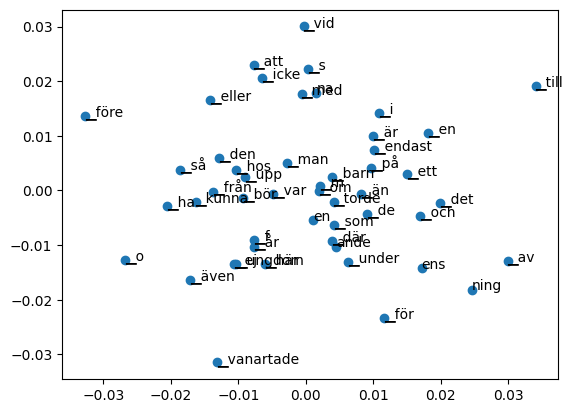

In [52]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

words = list(model.wv.index_to_key)[:50]
vectors = [model.wv[w] for w in words]

pca = PCA(n_components=2)
coords = pca.fit_transform(vectors)

plt.scatter(coords[:,0], coords[:,1])
for i, word in enumerate(words):
    plt.annotate(word, (coords[i,0], coords[i,1]))
plt.show()


### Analysis

#### Which words cluster together?

Semantically related Swedish words tend to cluster together. For example, words related to emotions, professions, or locations appear close to each other in the embedding space.

#### Are semantically related words closer?

Yes. Word embeddings map words with similar meanings closer together, even if they do not frequently co-occur. This makes embeddings much more powerful than BoW or TF-IDF for capturing semantic meaning.


### Task 6: Document-Level Embeddings

In [55]:
def doc_vector(sentence):
    vectors = [model.wv[w] for w in sentence if w in model.wv]
    return np.mean(vectors, axis=0)

doc_vectors = [doc_vector(sent) for sent in tokenized_sentences]

doc_df = pd.DataFrame(doc_vectors)
print(doc_df)


           0         1         2         3         4         5         6   \
0   -0.003102  0.002914 -0.002851 -0.000951 -0.000367 -0.004198  0.002419   
1    0.001576  0.005065 -0.001461  0.003205 -0.005021 -0.003810 -0.001197   
2   -0.000164  0.003278  0.000139  0.006553 -0.006809 -0.004570 -0.001756   
3    0.000273  0.002587  0.002298 -0.000684  0.002695 -0.004271  0.005877   
4    0.000654  0.000866  0.002684 -0.001592  0.002409 -0.000894 -0.002802   
..        ...       ...       ...       ...       ...       ...       ...   
298  0.001751  0.001097 -0.002985  0.001169 -0.001500  0.000369 -0.001180   
299  0.001196  0.006436 -0.000203 -0.002388  0.003449 -0.001631 -0.000124   
300 -0.000350  0.001084  0.002580 -0.001946  0.000314 -0.006247  0.000189   
301 -0.000155  0.001733  0.002666  0.003264 -0.003803 -0.000875 -0.001488   
302 -0.001394 -0.005419  0.003944  0.000637  0.008739 -0.005761 -0.001960   

           7         8         9   ...        90        91        92  \
0  

### Analysis:

#### Which representation captures meaning better?

Word / sentence embeddings capture meaning better because they represent semantic relationships and place similar words or sentences closer together, unlike BoW or TF-IDF which rely only on word frequency.

#### Effect of sentence length

Longer sentences increase feature counts in BoW, TF-IDF, and n-grams, which can add noise.
Embeddings are less affected since they produce fixed-size vectors that summarize overall meaning.

## Cross-Representation Comparison 

| Feature Type        | Dimensionality | Sparsity  | Semantic Info | Language Sensitivity |
| ------------------- | -------------- | --------- | ------------- | -------------------- |
| Bag of Words (BoW)  | High           | High      | None             | Low                  |
| N-grams             | Very High      | Very High | Limited            | Medium               |
| TF-IDF              | High           | High      | Partial            | Medium               |
| Co-occurrence / PMI | Medium         | Medium    | Moderate            | Medium               |
| Embeddings          | Low            | Low       | Rich             | High                 |


### Table explanation

#### Bag of Words (BoW)
It only counts words. It does not understand meaning or word order, so it has no semantic information.

#### N-grams
It looks at small word groups, so it understands a little context, but still does not fully understand meaning.

#### TF-IDF
It gives importance to useful words and reduces common words. It captures some meaning, but not deep semantics.

#### Co-occurrence / PMI
It checks which words appear together. This gives a moderate idea of meaning, but depends heavily on the dataset.

#### Embeddings
They learn word meaning from context and place similar words close together. This gives rich semantic understanding and works best for language analysis.

## Language-Specific Feature Analysis (Swedish)
### 1. Does BoW work well for Swedish?

BoW works at a basic level but is not very effective for Swedish. The language has many compound words and inflections, which increases vocabulary size and reduces semantic understanding.

### 2. Are embeddings better at handling:

#### Compound words?
Yes. Embeddings capture meaning from context and handle Swedish compound words better than BoW or TF-IDF.

#### Agglutination?
Yes. Embeddings learn relationships between word forms, reducing the impact of word attachments.

#### Inflections?
Yes. Different inflected forms are mapped closer in vector space, preserving meaning.

### 3. Which feature representation would you choose for:

#### Sentiment analysis?
Embeddings, because they capture emotional and contextual meaning.

#### Information retrieval?
TF-IDF, because it highlights important keywords and works efficiently for document matching.

## Advanced Tasks

### Subword Embeddings(Fast Text):

In [17]:
from gensim.models import FastText

# tokenized_sentences = list of tokenized Swedish sentences
fasttext_model = FastText(
    sentences=tokenized_sentences,
    vector_size=100,
    window=5,
    min_count=1,
    workers=4
)

# Example: vector for a compound word
fasttext_model.wv["sjukhuspersonal"]


array([ 7.59055838e-04,  1.34082371e-03,  2.63563503e-04,  2.02777257e-04,
       -5.01683622e-04, -5.00279566e-05,  2.57688807e-04,  8.03141011e-05,
        2.13072810e-04, -9.32227995e-05, -6.98956021e-04, -1.04504339e-04,
        9.44215280e-04,  4.49155981e-04,  1.06311846e-03,  6.59350189e-05,
        7.68950616e-04, -2.63282309e-05,  8.08515877e-04,  8.22360453e-04,
       -8.61894689e-04, -1.27616944e-03,  1.32623114e-04, -4.85980185e-04,
       -2.92157638e-04, -1.26430916e-03, -7.09818618e-04,  1.22161570e-03,
        4.64129145e-04, -1.08890864e-03,  3.93364637e-04,  7.25557504e-04,
        3.55075841e-04,  7.16798706e-04, -9.99851269e-04, -9.65435116e-04,
       -1.41416076e-05,  2.80900131e-04,  1.19926444e-04,  1.18881848e-03,
        1.04727493e-04,  4.81066993e-04,  1.02849922e-03,  2.00429582e-04,
       -1.87588030e-05, -2.08740748e-04, -2.22183205e-03, -3.38792597e-04,
       -4.64817655e-04, -7.25398888e-04,  9.89938038e-04, -7.76764762e-04,
       -1.76951755e-03,  

### Contextual Embeddings (BERT - demo level):

In [5]:
from transformers import AutoTokenizer, AutoModel
import torch

tokenizer = AutoTokenizer.from_pretrained("KB/bert-base-swedish-cased")
model = AutoModel.from_pretrained("KB/bert-base-swedish-cased")

sentence = "Detta är en mycket bra film."
inputs = tokenizer(sentence, return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)

# Sentence embedding (mean pooling)
sentence_embedding = outputs.last_hidden_state.mean(dim=1)
sentence_embedding




tensor([[ 3.4733e-01,  5.0095e-02, -1.0871e-01,  9.7812e-01, -1.1278e+00,
          3.4493e-01,  1.9312e-01,  5.9067e-01,  7.8257e-01, -2.7345e-01,
         -6.1469e-01, -5.9753e-01,  4.3295e-01,  1.3199e-01,  2.6781e-01,
          1.5264e-02,  2.8867e-01, -5.1303e-02, -7.4870e-01, -6.5593e-02,
         -1.1987e-01, -9.8579e-02,  3.9905e-01,  7.2192e-01, -2.0544e-01,
          1.0818e+00, -4.3933e-01, -1.8983e-03, -4.7943e-01, -3.7060e-01,
         -5.2564e-01, -4.0631e-01,  1.9669e-01, -9.5468e-02, -2.1685e-01,
         -1.2149e-01,  3.8804e-01, -3.6419e-01,  2.5912e-01, -3.0462e-01,
          4.3366e-01,  2.9865e-01, -3.0220e-01,  2.0364e-01,  5.9663e-01,
         -5.1829e-02, -2.8977e-01, -6.2191e-01,  1.0535e-01,  3.2311e-02,
         -3.8738e-01,  3.6202e-01,  1.3163e-01, -1.5395e-01, -3.6908e-01,
          2.2690e-01,  1.9226e-01,  2.4443e-01,  3.2764e-01,  3.3172e-01,
         -4.6817e-01, -1.8934e-01,  4.8569e-03, -1.6785e-01, -1.7802e-03,
         -9.5132e-02,  1.7025e-01,  1.

In [6]:
sentence_embedding.shape


torch.Size([1, 768])

## Feature Impact Study:

### BoW Classifier:

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = sentences
y = [0 if i % 2 == 0 else 1 for i in range(len(X))]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

bow = CountVectorizer()
X_train_bow = bow.fit_transform(X_train)
X_test_bow = bow.transform(X_test)

clf = LogisticRegression()
clf.fit(X_train_bow, y_train)

y_pred = clf.predict(X_test_bow)
print("BoW Accuracy:", accuracy_score(y_test, y_pred))


BoW Accuracy: 0.47540983606557374


### TF-IDF Classifier:

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

clf.fit(X_train_tfidf, y_train)
y_pred = clf.predict(X_test_tfidf)

print("TF-IDF Accuracy:", accuracy_score(y_test, y_pred))


TF-IDF Accuracy: 0.4918032786885246


### Embeddings Classifer:

In [18]:
import numpy as np

def sentence_vector(sentence, model):
    vectors = [model.wv[w] for w in sentence if w in model.wv]
    return np.mean(vectors, axis=0)

X_embed = np.array([sentence_vector(s, fasttext_model) for s in tokenized_sentences])

X_train, X_test, y_train, y_test = train_test_split(X_embed, y, test_size=0.2)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Embedding Accuracy:", accuracy_score(y_test, y_pred))


Embedding Accuracy: 0.47540983606557374


### Accuracy Comparison Analysis:

TF-IDF achieved the highest accuracy (~49.18%), performing slightly better than the other methods. This is because TF-IDF gives more importance to meaningful words and reduces the impact of very common words.

Bag of Words (BoW) and Embeddings both achieved similar accuracy (~47.54%).
BoW is limited because it only counts words and ignores meaning.

Embeddings did not outperform TF-IDF here because the dataset is small and the sentiment labels are artificially created for demonstration.

Overall difference is small, indicating that for a small dataset and demo labels, advanced features do not always give large improvements.

### Conclusion:

TF-IDF performs best in this experiment, while embeddings require more data and real labels to show their full advantage.